# Advanced Project: Long Run
## Implementing the Solow Model


In [2]:
# Insert code needed for libraries here
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Preliminaries 

The code below will illustrate how to create a dataframe that grows with a loop. This is an important skill that will be used throughout this homework assignment and the remainder of the course. This example is only an illustration of principles of coding. The particular application will vary depending on the circumstance.




Reached ending condition in 20 time periods


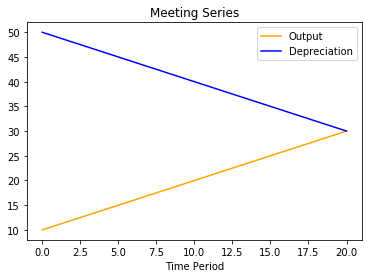

In [5]:
# This example shows two variables, one that is growing and one that is decreasing over time.
# The loop that follows creates a time-path for each variable until the point where both 
# series meet.

# Define parameters and exogeneous variables

a1_0 = 10      #Array 1 initial value
a2_0 = 50      #Array 2 initial value
epsilon = 1    #While loop tolerance

# Defining the arrays and loop index i

i = 0
time = [0]
array1 = np.array([a1_0])
array2 = np.array([a2_0])



# Using a while loop to run until we are within epsilon of the ending condition

while array2[i]-array1[i] > epsilon:
    i += 1
    time = np.append(time, i)
    array1 = np.append(array1, array1[i - 1] + 1) 
    array2 = np.append(array2, array2[i - 1] - 1)
    
# Print the results
print('Reached ending condition in',time[i],'time periods')


# Create a data frame with the final values

df = pd.DataFrame({'Time':time, 
                   'Array1':array1, 
                   'Array2':array2}, 
                    columns=['Time', 'Array1', 'Array2'])


plt.plot(time, array1, 'orange', label = 'Output')
plt.plot(time, array2, 'blue', label = 'Depreciation')
plt.title('Meeting Series')
plt.xlabel('Time Period')
plt.legend()
plt.show()

Reached ending condition in 23 time periods


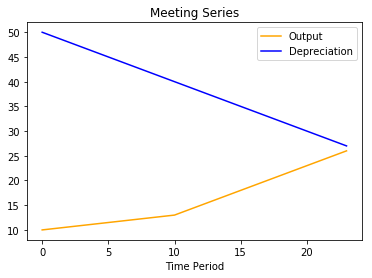

In [6]:
# Suppose that instead you want to merge two time series into one array to illustrate what happens before and after an event.
# One way to do this in a dynamic setting like this one is to create an index that will span both time series
# and build them into one array through loops. 
# The following example will show you how to create a time-path of a variable that experiences a change during its path.

# Define parameters and exogeneous variables

a1_0 = 10      #Array 1 initial value
a2_0 = 50      #Array 2 initial value
epsilon = 1    #While loop tolerance

# Defining the arrays and loop index i

i = 0
time = [0]
array1 = np.array([a1_0])
array2 = np.array([a2_0])


# For the first 10 periods array 1 will increase by only 0.3 each time period. At the end of time 
# period 10 array 1 will grow at 2 per period.
# Note that array 2 is decreasing 1 unit per period.

for i in range(0, 10):
    i += 1    
    time = np.append(time, i)
    array1 = np.append(array1, array1[i - 1] + 0.3) 
    array2 = np.append(array2, array2[i - 1] - 1)

# Now start a while loop starting where we left of and let it  run until we are within epsilon of the ending condition
# Note that because we haven't re-defined the variable i, the variable i is still at the value 10, where the previous
# loop finished. The first line of this new loop (i += 1) will move the counter to i=11 and start the counter again. 

while array2[i]-array1[i] > epsilon:
    i += 1
    time = np.append(time, i)
    array1 = np.append(array1, array1[i - 1] + 1) 
    array2 = np.append(array2, array2[i - 1] - 1)
    
# Print the results

print('Reached ending condition in',time[i],'time periods')

# Create the dataframe by combining the arrays. 

df = pd.DataFrame({'Time':time, 
                   'Array1':array1, 
                   'Array2':array2}, 
                    columns=['Time', 'Array1', 'Array2'])


plt.plot(time, array1, 'orange', label = 'Output')
plt.plot(time, array2, 'blue', label = 'Depreciation')
plt.title('Meeting Series')
plt.xlabel('Time Period')
plt.legend()
plt.show()

## Q1) Implementing the Solow Model using Python

The Solow model incorporates the evolution of variables over time (dynamics). This question will walk you through implementing the Solow model numerically using Python. The end goal of this exercise is to teach you how to use the model to generate a time series that shows the change in output and capital over time.

| Description             | Formula                           |
|-------------------------|-----------------------------------|
| Unknowns/endogenous variables:     | $Y_t$, $K_t$, $L_t$, $C_t$, $I_t$ | 
| Production Function: | $Y \text{ = } \bar{A}K_t^{\alpha}L_t^{1-\alpha}$|
| Capital Accumulation:   | $\Delta K_{t+1}$ = $ I_t -$ $\bar{d}K_t$ |
| Labor Force: | $L_t = \bar{L}$ |
| Resource Constraint: | $C_t + I_t = Y_t$ |
| Allocation of Resources: | $I_t = \bar{s}Y_t$ |
| Parameters | $\bar{A}$, $\bar{s}$, $\bar{d}$, $\bar{L}$, $\bar{K_0}$ |

The text below shows how to find the steady state of capital and production found in the textbook. The solution below doesn't use numbers for the parameters of the capital share, instead we use $\alpha$ as the capital share of output and $(1-\alpha)$ for the labor share of output. 

The steady-state level of capital is such that 

$$
\bar{s}Y^\ast = \bar{d}K^{\ast}.
$$

Substituting from the production function for $Y^\ast$ we see that 

$$
\bar{s}\bar{A}K^{\ast \alpha}\bar{L}^{1 - \alpha} = \bar{d}K^\ast.
$$

We now solve for $K^\ast$ which yields 

\begin{align*}
\bar{s}\bar{A}K^{\ast \alpha}\bar{L}^{1 - \alpha} &= \bar{d}K^\ast\\
\bar{s}\bar{A}\bar{L}^{1 - \alpha} &= \frac{\bar{d}K^\ast}{K^{\ast \alpha}}\\
\frac{\bar{s}\bar{A}}{\bar{d}}\bar{L}^{1 - \alpha} &= K^{\ast 1 - \alpha}\\
\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\left(\bar{L}^{1 - \alpha}\right)^\frac{1}{1 - \alpha} & = \left(K^{\ast 1 - \alpha}\right)^\frac{1}{1 - \alpha}\\
K^\ast & = \left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\bar{L}\\
\end{align*}

as required.

We will now find the steady-state level of production. Using the production function we have

$$
Y^{\ast} = \bar{A} K^{\ast\alpha}\bar{L}^{1 - \alpha}.
$$

Substituting the solutions for $K^\ast$ into this equation yields

\begin{align*}
Y^\ast =& \bar{A}\left[\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\bar{L} \right]^\alpha\bar{L}^{1 - \alpha}\\
=& \bar{A}\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{L}^{ \ \alpha + 1 - \alpha}\\
=& \bar{A} \cdot \bar{A}^\frac{\alpha}{1 - \alpha}\left(\frac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{L}^{ \ \alpha + 1 - \alpha}\\
=& \left(\frac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{A}^\frac{1}{1 - \alpha}\bar{L}
\end{align*}

thus giving the steady state of production as required.

__(a)__: Let $K_0 = 100$, $L = 1000$, $A = 1$, $\bar{d} = 0.15$, $\bar{s} = 0.25$, and $\alpha=1/3$. What are the numerical values for $K^*$ and $Y^*$? 

$$
\left(\frac{\bar{s}\bar{A}}{\bar{d}}\right)^\frac{1}{1 - \alpha}\bar{L} = K^\ast
$$

$$
\bar{A}^\frac{1}{1 - \alpha}\left(\frac{\bar{s}}{\bar{d}}\right)^\frac{\alpha}{1 - \alpha}\bar{L}= Y^\ast
$$

In [7]:
# Define exogenous variables and parameter values.

K_0 = 100
L = 1000
A = 1
d = 0.15
s = .20
alpha = 1/3

# Find and print the steady state values for capital and output. 
    # Hint1: The python function pow() can be useful when when working with powers that have fractions
    # Hint2: To save you time, use functions that you might call upon later.

#You can use a lambda function or a block function. They are the same
K_star = lambda L, s, d, A, alpha: (L * pow((s * A) / d, 1 / (1 - alpha)))

def Y_star(L, s, d, A, alpha):
    return pow(s / d, alpha / (1 - alpha)) * pow(A, 1 / (1 - alpha)) * L 



# Print the output of your function
    #Hint3: You can use '{:,.2f}'.format(output) to format your print output.
    #       the comma will be the thousands separator, and .2f limits the decimals,
    #       where f stands for the type of string output: float

print('Capital steady state: ', '{:,.2f}'.format(K_star(L, s, d, A, alpha)))
print('Output steady state: ', '{:,.2f}'.format(Y_star(L, s, d, A, alpha)))

Capital steady state:  1,539.60
Output steady state:  1,154.70


__(c)__ Now, let's simulate the path of some key variables. This exercise will help you see how the model dynamics work and illustrate how the model can generate time series that we can use to make predictions. Your goal is to create a Pandas data frame with the same structure as the table below. Start with time $t=0$ and continue until you have arrived at the steady-state within a precision of $\epsilon=10$. 

| Time, t | Capital, $K_t$ | Production, $Y_t$ | Investment, $I_t$ | Depreciation, $\bar{d}K_t$  | Change in capital, $\Delta K_{t +1}$ |
|---------|----------------|-------------------|----------------------------|--------------------------------------|-------|
| 0       |  100           |          NA       |              NA            |                 NA                   |   NA  |  
| 1       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| 2       |  ...           |         ...       |             ...            |                ...                   |  ...  |
| 3       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| 4       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| 5       |  ...           |         ...       |             ...            |                ...                   |  ...  |  
| ...     |  ...           |         ...       |             ...            |                ...                   |  ...  |  

In [15]:
# Define exogenous variables and parameters values.

K_0 = 100
L = 1000
A = 1
d = 0.15
s = .20
alpha = 1/3
epsilon = 10

def production_function(A, K, L, alpha):
    return A * pow(K, alpha) * pow(L, 1 - alpha)

# Defining the arrays and loop index i. There should be one index array (time),
# an array for capital, output, investment, depreciation, and change in capital 
# as there is in the table above.

time = [0]
capital = np.array([K_0])
output = np.array([production_function(A, K_0, L, alpha)])
investment = np.array([s * output[0]])
depreciation = np.array([d * capital[0]])
change_in_capital = np.array([investment[0] - depreciation[0]])
i = 0

# Use a while loop to run until capital is within epsilon of the steady state we calculated in part (b). 
# Use the loop to also calculate values of all the variables required at the table. 
capital_steady_state = K_star(L, s, d, A, alpha)

while (abs(capital[i] - capital_steady_state)) >epsilon:
    i += 1
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
    output = np.append(output, production_function(A, capital[i], L, alpha))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])

# Print the results, make sure your output is formatted and readable. See previous homework solutions for ideas.

print('Reached steady state in',time[i],'time periods')
print('Capital:', '{:,.2f}'.format(capital[i]))
print('Output:', '{:,.2f}'.format(output[i]))
print('Investment:', '{:,.2f}'.format( investment[i]))
print('Depreciation: ', '{:,.2f}'.format( depreciation[i]))
print('Change in capital: ', '{:,.2f}'.format( change_in_capital[i], '\n'))

# Create a data frame with all the arrays you created in the while loop.
# Print the data frame with the final values

df = pd.DataFrame({'Time':time, 
                   'Capital':capital, 
                   'Output':output, 
                   'Investment':investment, 
                   'Depreciation':depreciation, 
                   'Change in Capital':change_in_capital}, 
                   columns=['Time', 'Capital', 'Output', 'Investment', 'Depreciation', 'Change in Capital'])
df


Reached steady state in 51 time periods
Capital: 1,530.16
Output: 1,152.34
Investment: 230.47
Depreciation:  229.52
Change in capital:  0.94


,Time,Capital,Output,Investment,Depreciation,Change in Capital
0,0,100.000000,464.158883,92.831777,15.000000,77.831777
1,1,177.831777,562.345368,112.469074,26.674767,85.794307
2,2,263.626084,641.203857,128.240771,39.543913,88.696859
3,3,352.322943,706.285529,141.257106,52.848441,88.408664
4,4,440.731607,761.011814,152.202363,66.109741,86.092622
5,5,526.824229,807.647612,161.529522,79.023634,82.505888
6,6,609.330117,847.782045,169.556409,91.399518,78.156892
7,7,687.487009,882.581524,176.516305,103.123051,73.393254
8,8,760.880262,912.932720,182.586544,114.132039,68.454505
9,9,829.334767,939.528497,187.905699,124.400215,63.505484


__(d)__: Make a time series plot of investment, depreciation, and output. Start at $t=0$ and end the when you've reached the steady state.

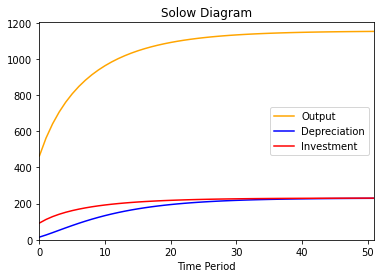

In [16]:
# The easiest way to create the plot is using plt.plot

plt.plot(time, output, 'orange', label = 'Output')
plt.plot(time, depreciation, 'blue', label = 'Depreciation')
plt.plot(time, investment, 'red', label = 'Investment')
plt.title('Solow Diagram')
plt.xlabel('Time Period')
plt.ylim(0, np.max(output)+50)  # Sets the range for the y axis. They depend on the value of output.
plt.xlim(0, i)   
plt.legend()
plt.show()

__e)__ What happens when you change the tolerace of the while loop, $\epsilon$?

The point at which the steady state is reached changes. If we end the loop at epislon the parameters must shift suffeciently to reach steady state by the end of our loop.

## Q2) A Decrease in the Investment Rate

__a)__ Suppose the country we analyzed in the previous question enacts a tax policy that discourages investment. The policy reduces the investment rate immediately and permanently from $\bar{s}=0.2$ to $\bar{s}^{\prime}=0.1$ at $t=10$. Assuming the economy starts in its initial steady-state at $t=0$, use the Solow model to create a graph showing how output, capital, and investment evolve.

Capital steady state:  544.33
Output steady state:  816.50


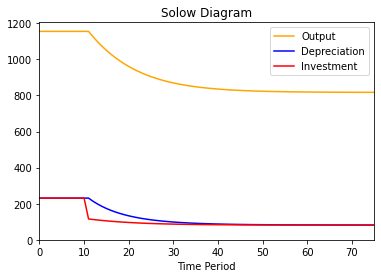

In [4]:


# Define exogenous variables and parameters values.

K_0 = 100
L = 1000
A = 1
d = 0.15
s = .20
sbar = .1
alpha = 1/3
epsilon = 1

#Functions
def production_function(A, K, L, alpha):
    return A * pow(K, alpha) * pow(L, 1 - alpha)

#K_star = lambda L, s, d, A, alpha: (L * pow((s * A) / d, 1 / (1 - alpha)))

def Y_star(L, s, d, A, alpha):
    return pow(s / d, alpha / (1 - alpha)) * pow(A, 1 / (1 - alpha)) * L 

def K_star(L, s, d, A, alpha):
    return L * pow((s * A) / d, 1 / (1 - alpha))

capital_steady_state = K_star(L, s, d, A, alpha)

#Define Array
i = 0
time = [0]
capital = np.array([K_star(L,s,d,A,alpha)])
output = np.array([Y_star(L,s,d,A, alpha)])
investment = np.array([s * output [0]])
depreciation = np.array([d * capital[0]])
change_in_capital = np.array([investment[0]- depreciation[0]])


# Defining the arrays and loop index i. There should be one index array (time),
# an array for capital, output, investment, depreciation, and change in capital 
# as there is in the table above.
for i in range(0, 10):
    i += 1
    time = np.append(time, i)   
    capital = np.append(capital, capital[i-1] + change_in_capital[i-1] )
    output = np.append(output, [production_function(A, capital[i], L, alpha)])
    investment = np.append(investment, [s * output[0]])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, [investment[i] - depreciation[i]])


#new savings level
s= sbar


#loop length thing
epsilon = 1

# Use a while loop to run until capital is within epsilon of the steady state we calculated in part (b). 
# Use the loop to also calculate values of all the variables required at the table. 


while (abs(capital[i] - K_star(L, s, d, A, alpha))) >epsilon:
    i += 1
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
    output = np.append(output, production_function(A, capital[i], L, alpha))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])

# Print the results, make sure your output is formatted and readable. See previous homework solutions for ideas.

print('Capital steady state: ', '{:,.2f}'.format(K_star(L, s, d, A, alpha)))
print('Output steady state: ', '{:,.2f}'.format(Y_star(L, s, d, A, alpha)))



# Create a data frame with all the arrays you created in the while loop.
# Print the data frame with the final values

#df = pd.DataFrame({'Time':time, 
                   #'Capital':capital, 
                   #'Output':output, 
                   #'Investment':investment, 
                   #'Depreciation':depreciation, 
                   #'Change in Capital':change_in_capital}, 
                   #columns=['Time', 'Capital', 'Output', 'Investment', 'Depreciation', 'Change in Capital'])

plt.plot(time, output, 'orange', label = 'Output')
plt.plot(time, depreciation, 'blue', label = 'Depreciation')
plt.plot(time, investment, 'red', label = 'Investment')
plt.title('Solow Diagram')
plt.xlabel('Time Period')
plt.ylim(0, np.max(output)+50)  # Sets the range for the y axis. They depend on the value of output.
plt.xlim(0, i)   
plt.legend()
plt.show()

## Q3) Technology Transfer in the Solow Growth Model

One explanation for China's rapid economic growth during the past several decades is its expansion of policies that encourage "technology transfer." By this, we mean policies—such as opening up to international trade and attracting multinational corporations through various incentives—that promote the use and adoption of new ideas and new technologies in China. 

This question asks you to use the Solow model to study this scenario. Suppose China begins in the steady-state. Then, to keep the problem simple, let's assume the sole result of these technology transfer policies is to increase TFP from $\bar{A}=1$ to $\bar{A}=2$ permanently. 

__(a)__: Create a graph using Python, showing what happens to output in China over time. Yes, use the parameters and variable values from Q1) as as your starting point.  What happens to output per person in China in the long run? Pease use 10 periods of steady state values before the change in $\bar{A}$ goes into effect.

Capital steady state:  4,354.65
Output steady state:  3,265.99


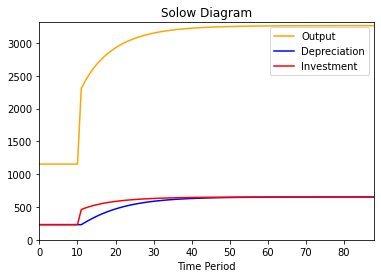

In [5]:
#define variables
K_0 = 100
L = 1000
A = 1
Abar = 2
d = 0.15
s = .20
alpha = 1/3

#define functions 
def K_star(L, s, d, A, alpha):
    return L * pow((s * A) / d, 1 / (1 - alpha))

def Y_star(L, s, d, A, alpha):
    return pow(s / d, alpha / (1 - alpha)) * pow(A, 1 / (1 - alpha)) * L 

#initial array
time = [0]
capital = np.array([K_star(L, s, d, A, alpha)])
output = np.array([Y_star(L, s, d, A, alpha)])
investment = np.array([s * output[0]])
depreciation = np.array([d * capital[0]])
change_in_capital = np.array([investment[0] - depreciation[0]])

#loops

for i in range(0, 10):
    i += 1
    time = np.append(time, i)   
    capital = np.append(capital, capital[i-1] + change_in_capital[i-1] )
    output = np.append(output, [production_function(A, capital[i], L, alpha)])
    investment = np.append(investment, [s * output[0]])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, [investment[i] - depreciation[i]])


#new A level
A= Abar
#loop length thing
epsilon = 1

while (abs(capital[i] - K_star(L, s, d, A, alpha))) >epsilon:
    i += 1
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
    output = np.append(output, production_function(A, capital[i], L, alpha))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])

#print outputs
print('Capital steady state: ', '{:,.2f}'.format(K_star(L, s, d, A, alpha)))
print('Output steady state: ', '{:,.2f}'.format(Y_star(L, s, d, A, alpha)))



#plot
def Chart1():
    plt.plot(time, output, 'orange', label = 'Output')
    plt.plot(time, depreciation, 'blue', label = 'Depreciation')
    plt.plot(time, investment, 'red', label = 'Investment')
    plt.title('Solow Diagram')
    plt.xlabel('Time Period')
    plt.ylim(0, np.max(output)+50)  # Sets the range for the y axis. They depend on the value of output.
    plt.xlim(0, i)   
    plt.legend()
    plt.show()

Chart1()

__(b)__: Create a graph showing what happens to the growth rate of output in China over time. Explain why the data follows that pattern.

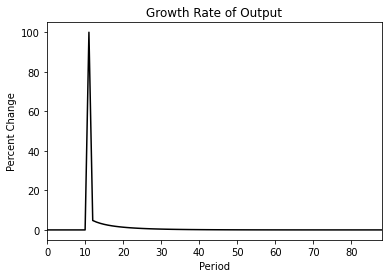

In [6]:
Gr = [0]
time_f = [0]

for k in range(0, len(time)-1):
    k += 1
    time_f = np.append(time_f, k)
    Gr = np.append(Gr, (output[k]- output[k-1])/ output[k-1] *100)



plt.plot(time_f, Gr, 'black', label = 'Output')
plt.title('Growth Rate of Output')
plt.xlabel('Period')
plt.ylabel('Percent Change')
plt.xlim(0, len(time)-1)  
plt.show() 



Explanation:
When we double TFP for 1 period it causes a 100% increase in the Total factor production of China, as we made this change permanent  the production spikes and then returns to a new steady state.

## Q4) Foreign Aid

After a disastrous encounter with Covid-19, Ethiopia receives a sizeable foreign aid package. Assume the aid doubles Ethiopia's current capital stock at $t=10$ . There is no change in parameters. Illustrate what happens to the economy, both immediately and over time.

__a)__ Suppose that the country finds itself on its steady state until $t=10$, when they receive the gift. Use the parameters and variable values from Q1) as as your starting point. Use the Solow model to create a graph showing how output, capital, and investment evolve over time. 

Capital steady state:  1,539.60
Output steady state:  1,154.70


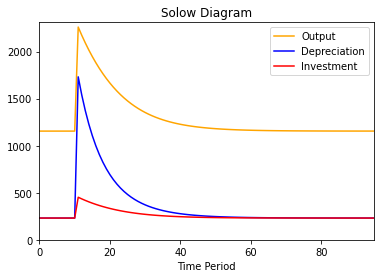

In [28]:
#reset variables again
K_0 = 100
L = 1000
A = 1
d = 0.15
s = .20
alpha = 1/3

# reset array

time = [0]
capital = np.array([K_star(L, s, d, A, alpha)])
output = np.array([Y_star(L, s, d, A, alpha)])
investment = np.array([s * output[0]])
depreciation = np.array([d * capital[0]])
change_in_capital = np.array([investment[0] - depreciation[0]])

#re-run loops 
for i in range(0, 10):
    i += 1    
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
    output = np.append(output, production_function(A, capital[i], L, alpha))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])

#set new capital growth
capital[i] = capital[i] + 10000
epsilon = 1

while (abs(capital[i] - K_star(L, s, d, A, alpha))) >epsilon:
    i += 1
    time = np.append(time, i)
    capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
    output = np.append(output, production_function(A, capital[i], L, alpha))
    investment = np.append(investment, s * output[i])
    depreciation = np.append(depreciation, d * capital[i])
    change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])       

def outputs():
    print('Capital steady state: ', '{:,.2f}'.format(K_star(L, s, d, A, alpha)))
    print('Output steady state: ', '{:,.2f}'.format(Y_star(L, s, d, A, alpha)))

outputs()
Chart1()


__(b)__: By what proportion does consumption per person initially increase? What happens to consumption in the long run?

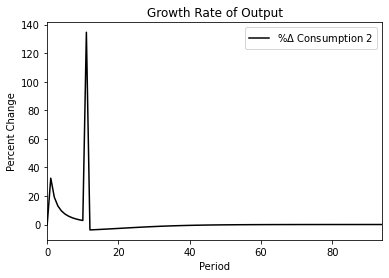

In [63]:
Var1 = ((1-s) *output)
#Var2 = depreciation

Gr = [0]
time_f = [0]
#rate of change function that doesnt work
def RoC(V1):
    global Gr
    global time_f
    for k in range(0, len(time)-1):
        k += 1
        time_f = np.append(time_f, k)
        Gr = np.append(Gr, (V1[k]- V1[k-1])/ V1[k-1] *100)

RoC(Var1)

plt.plot(time_f, Gr, 'black', label = '$\%\Delta$ Consumption 2')
plt.title('Growth Rate of Output')
plt.xlabel('Period')
plt.ylabel('Percent Change')
plt.xlim(0, len(time)-1)  
plt.legend()
plt.show()




Explain:
As total output initally doubles, so does consumption, if output goes from 100 to 200, an evenly split consumption/investment would see a jump from 50 and 50 to 100 and 100, or a 100% increase. as this change is static we quickly see the rate of change in consuption fall back to 0 as the jump in TFP has no lasting effect.

__(c)__: Suppose instead of starting in its steady state, the economy begins below its steady state, with a capital stock equal to $K_{0}=50$. Answer the same questions as part (a) for this case.

Capital steady state:  1,539.60
Output steady state:  1,154.70


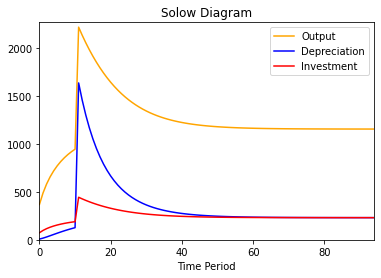

In [61]:
# resets variables and parameters and runs first 10 years

def Initial_fun(K_0, L, A,d,s,alpha,T2):
    global time
    global capital
    global output
    global investment
    global depreciation
    global change_in_capital
    global i
    time = [0]
    capital = np.array([K_0])
    output = np.array([production_function(A, K_0, L, alpha)])
    investment = np.array([s * output[0]])
    depreciation = np.array([d * capital[0]])
    change_in_capital = np.array([investment[0] - depreciation[0]])
    i = 0
    for i in range(0, T2):  
        i += 1    
        time = np.append(time, i)
        capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
        output = np.append(output, production_function(A, capital[i], L, alpha))
        investment = np.append(investment, s * output[i])
        depreciation = np.append(depreciation, d * capital[i])
        change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])


#runs remainder
def Remain_fun(L, A,d,s,alpha, epsilon):
    global time
    global capital
    global output
    global investment
    global depreciation
    global change_in_capital
    global i
    while (abs(capital[i] - K_star(L, s, d, A, alpha))) >epsilon:
        i += 1
        time = np.append(time, i)
        capital = np.append(capital, capital[i - 1] + change_in_capital[i - 1]) 
        output = np.append(output, production_function(A, capital[i], L, alpha))
        investment = np.append(investment, s * output[i])
        depreciation = np.append(depreciation, d * capital[i])
        change_in_capital = np.append(change_in_capital, investment[i] - depreciation[i])





Capital steady state:  1,539.60
Output steady state:  1,154.70


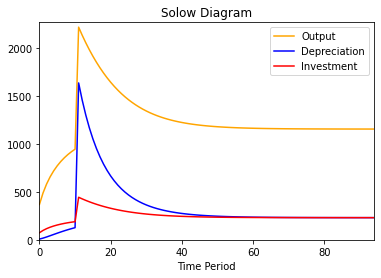

In [62]:
#define Variables
K_0 = 50
L = 1000
A = 1
d = 0.15
s = .20
alpha = 1/3
i = 0
T2= 10

Initial_fun(K_0, L, A,d,s,alpha,T2)

#input the new amount of capital at time i. 
capital[i] = capital[i] + 10000
epsilon = 1

Remain_fun(L, A,d,s,alpha, epsilon)
outputs()
Chart1()

Starting with output below potential we see rapid growth towards potential, with decreasig rates of change for capital and investment as the GR of output falls. Then we see capital take a temporary spike and the mirror of this effect as rises in capital and investment while the economy then falls back into steady state.